In [71]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime

In [72]:
df = pd.read_csv(Path('JNorth_Adult_Site.csv'))
df.head()

C:\conda\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species
0,0,850841703,12/16/1996,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1
1,1,851824801,12/6/1996,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1
2,2,854409931,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1
3,3,854557206,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1
4,4,855061862,1/1/1997,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1


In [74]:
# adding a column for year
#df = df.astype({'sighting_date': 'datetime64[ns]'})
#df['sighting_date'] =  pd.to_datetime(df['sighting_date'], format='%m/%d/%Y')
df['year'] = pd.DatetimeIndex(df['sighting_date']).year
df['year'] = pd.to_datetime(df.year, format='%Y')
#df['sighting_date'] =  pd.to_datetime(df['sighting_date'], format='%Y')
#df = df.astype({'year': 'datetime64[ns]'})
#df['year'] = df['year'].astype(date)
# changing year into date
#df['year'] = df.year.strftime("%Y%m%d")
#df.dtypes
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year
0,0,850841703,12/16/1996,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1,1996-01-01
1,1,851824801,12/6/1996,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1,1996-01-01
2,2,854409931,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1,1996-01-01
3,3,854557206,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1,1996-01-01
4,4,855061862,1/1/1997,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1,1997-01-01


In [75]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['sighting_date']).month
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
0,0,850841703,12/16/1996,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1,1996-01-01,12
1,1,851824801,12/6/1996,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1,1996-01-01,12
2,2,854409931,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1,1996-01-01,9
3,3,854557206,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1,1996-01-01,9
4,4,855061862,1/1/1997,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1,1997-01-01,1


In [77]:
# combining the year and month
#df['month_and_year'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
#df.head()

In [78]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["year"]).count()
counts = counts.reset_index()
counts.head(200)

,year,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,month
0,1996-01-01,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,1997-01-01,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704
2,1998-01-01,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492
3,1999-01-01,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
4,2000-01-01,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
5,2001-01-01,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,2002-01-01,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
7,2003-01-01,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
8,2004-01-01,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
9,2005-01-01,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47


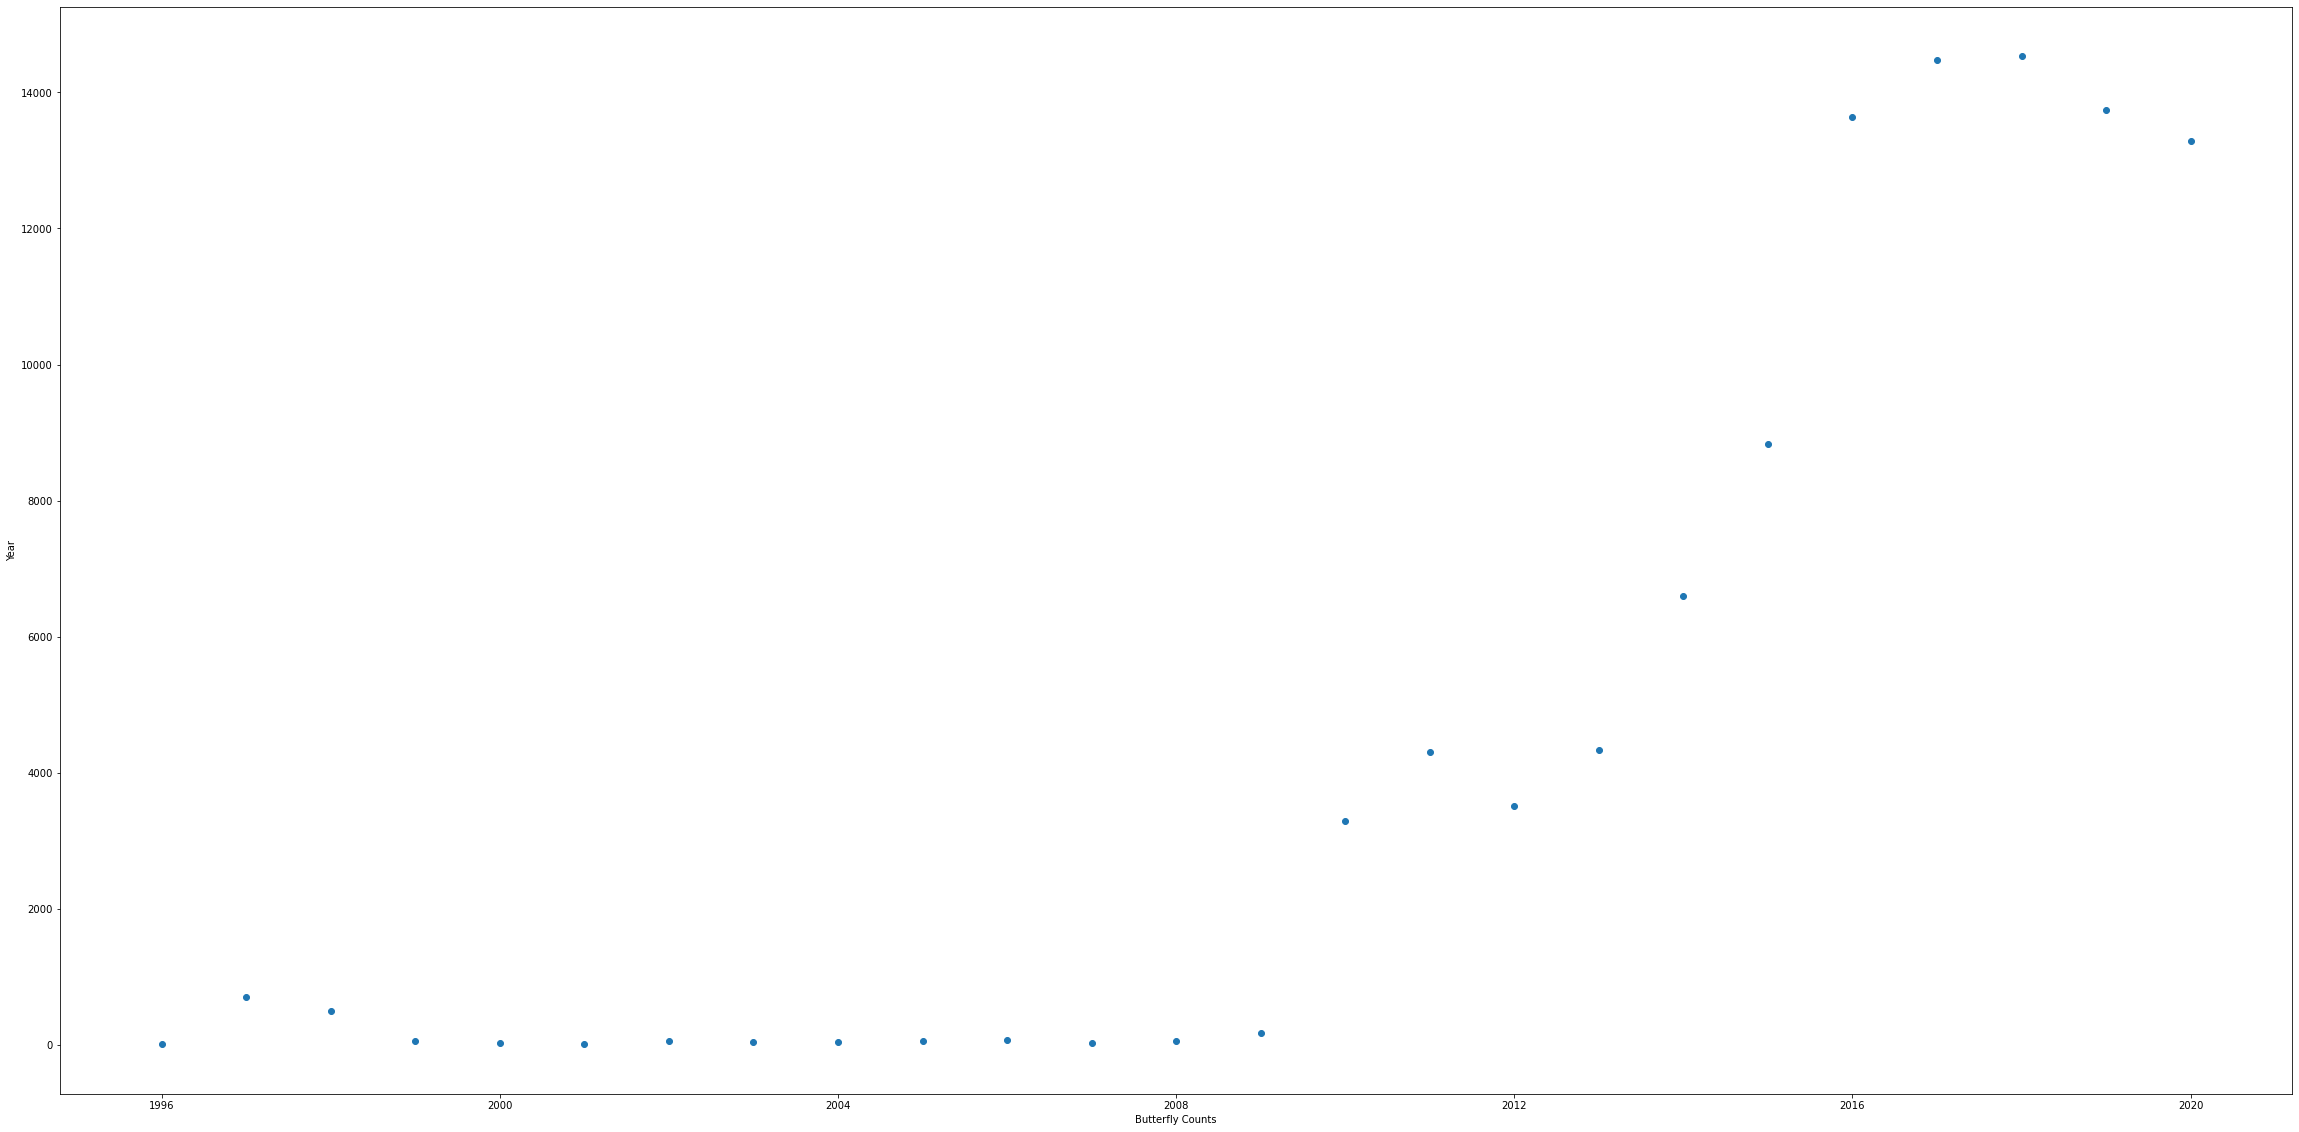

In [79]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
fig = plt.figure(figsize=(40, 20))
plt.scatter(counts.year, counts.sighting_date)
plt.xlabel('Butterfly Counts')
plt.ylabel('Year')

plt.show()

In [80]:
# using reshape
counts["year"] = counts["year"].apply(lambda x: x.toordinal())
# using reshape
X = counts.year.values.reshape(-1, 1)

In [81]:
# setting the y axis as the count of dates
y = counts.sighting_date.values.reshape(-1, 1)

In [82]:
# Training the data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
print(r2_score(y_test, regr.predict(X_test)))

0.7600440573117739
0.7600440573117739


In [83]:
# setting the model
model = LinearRegression()

In [84]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [85]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(25, 1)


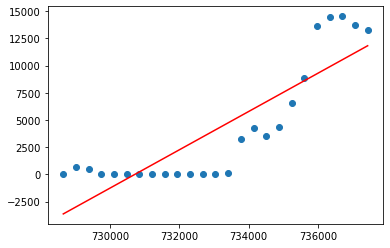

In [86]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [87]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (25, 3)


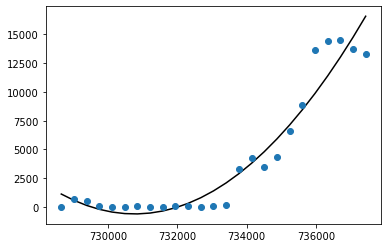

In [88]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (25, 4)


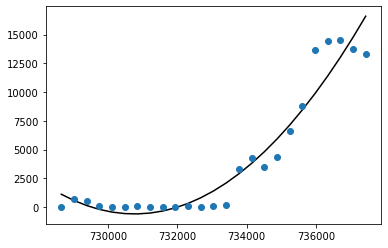

In [89]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (25, 5)


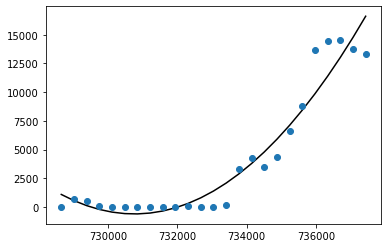

In [90]:
# 4th degree
fit_and_plot_poly_deg(4)